In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
np.random.seed = 42

# Linear Models

$$x=H\theta+\omega$$
$$\hat\theta=(H^TH)^{-1}H^Tx$$
$$C_{\hat\theta}=\sigma^2(H^TH)^{-1}$$
The linear estimator is MVU and efficient. Also
$$\hat\theta\sim\cal{N}(\theta,\sigma^2(H^TH)^{-1})$$

_This chapter is light on theory with a lot of examples. Some nice results with colored gaussian noise and known signal components. For now skipping to problems._

# Problems

**4.1** estimates the amplitudes of exponentials in noise.
$$x[n]=\sum_{i=1}^pA_ir_i^n+\omega[n]\qquad n=0,1,\dots,N-1$$
where $\omega\sim\cal{N}(0,\sigma^2)$. Find MVU estimator and covariance.


In [110]:
N = 100
sigma = 1
r = np.array([1.,-1])
p = r.size
A = np.array([3.,5])
assert(A.size==p)
H = np.power(np.stack([r]*N),
             np.column_stack([np.arange(N)]*p))
w = np.random.normal(0., sigma, N)
x = H@A+w

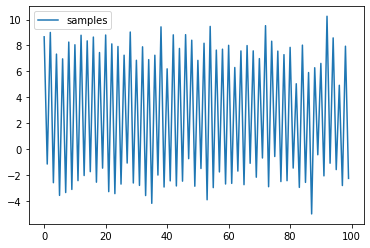

In [111]:
plt.plot(range(N), x, label='samples')
plt.legend()

In [223]:
def f(N, sigma, r1, r2, A1, A2):
    r = np.array([r1,r2])
    p = r.size
    A = np.array([A1,A2])
    assert(A.size==p)
    H = np.power(np.stack([r]*N),
                 np.column_stack([np.arange(N)]*p))
    w = np.random.normal(0., sigma, N)
    x = H@A+w
    plt.plot(range(N), x, label='samples')
    plt.legend()
    
sigma = widgets.FloatSlider(min=1e-1, value= 1., description='sigma')
N = widgets.IntSlider(min=2, max=200, description='N')
r1 = widgets.BoundedFloatText(value=1., description="", layout=widgets.Layout(flex="1 1 20%", min_width="50px"))
r2 = widgets.BoundedFloatText(value=1., description="", layout=r1.layout)
A1 = widgets.BoundedFloatText(value=1., description="", layout=r1.layout)
A2 = widgets.BoundedFloatText(value=1., description="", layout=r1.layout)
box_layout = widgets.Layout(display='flex',
#                     flex_flow='column',
                    align_items='stretch',
                    border='solid',
                    width='70%')
out = widgets.interactive_output(f, {'N': N, 'sigma': sigma, 'r1':r1, 'r2':r2, 'A1':A1, 'A2':A2})
box = widgets.VBox([sigma,N, widgets.Box([r1,r2,A1,A2],layout=box_layout), out])
display(box)

In [179]:
? r1.layout